In [2]:
import sys
sys.path.append('/Users/kelly/koskella_lab')
from tools import *

import plotly.express as px
def plot_timeseries_interactive(dataframe, title=None, legend_title="Series"):
    fig = px.scatter(dataframe, x=dataframe.index, y=dataframe.columns,
                     labels={'index': 'Time (hr)', 'value': 'OD reading', 'Series': legend_title},
                     title=title, color_discrete_sequence=px.colors.qualitative.Pastel)
    fig.update_traces(marker=dict(size=7))
    fig.show()
    
from scipy.stats import levene

In [3]:
df = pd.read_csv('/Users/kelly/Downloads/KH_RBG2_02282025.csv')
df = clean_and_transpose(df, 33, 131)
df = df.rename_axis('Time [hr]')
df1 = df.copy()

In [4]:
clean_df = remove_outliers(df, 1)
plot_timeseries_interactive(clean_df, 'Combined Growth Curve - outliers removed')

In [5]:
#split into 4 tables of technical replicates
table_1 = df.filter(regex=r'^[A-H][1-3]$') 
table_2 = df.filter(regex=r'^[A-H][4-6]$')
table_3 = df.filter(regex=r'^[A-H][7-9]$')
table_4 = df.filter(regex=r'^[A-H](10|11|12)$')

table_arr = [table_1, table_2, table_3, table_4]
avg_tables = []

#average every 3 wells
for df in table_arr:
    avg_df = df.groupby(df.columns.str[0], axis=1).mean()
    avg_tables.append(avg_df)

In [6]:
for i in range(1, 5):
    plot_timeseries_interactive(avg_tables[i-1], f'Biological Replicate - {i}', 'Technical Replicates')

## --- PFUs determined via phage titer on 3/3/3035 (~25.5 PFU on 10^-6 dil) ---

In [7]:
#plot all the different PFUs

list_char = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
tables = {}
num = -1

for char in list_char:
    tables[char] = df1.filter(regex=f'^{char}')
    if char == 'A':
        title = f'row {char} - 0 PFU'
    elif char == 'B':
        title = f'row {char} - < 10 PFU'
    else:
        title = f'row {char} - 10^{num} phage'
    plot_timeseries_interactive(tables[char], title, 'Wells')
    num+=1
    


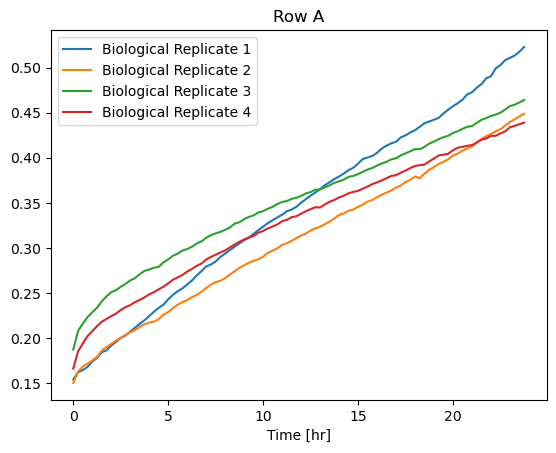

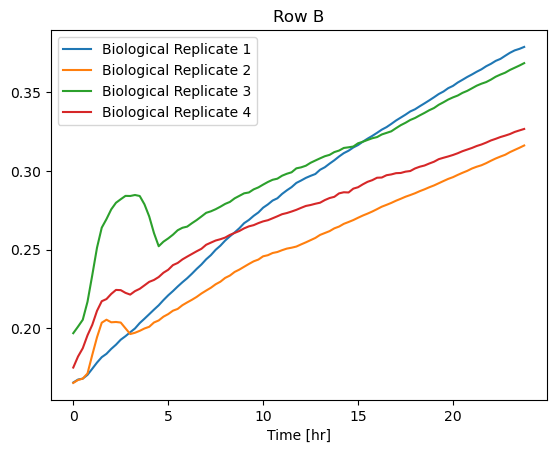

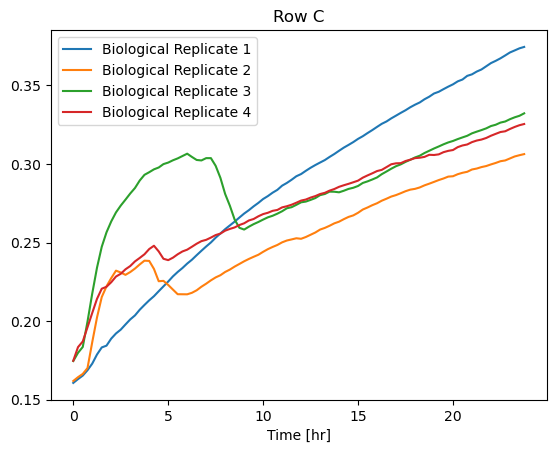

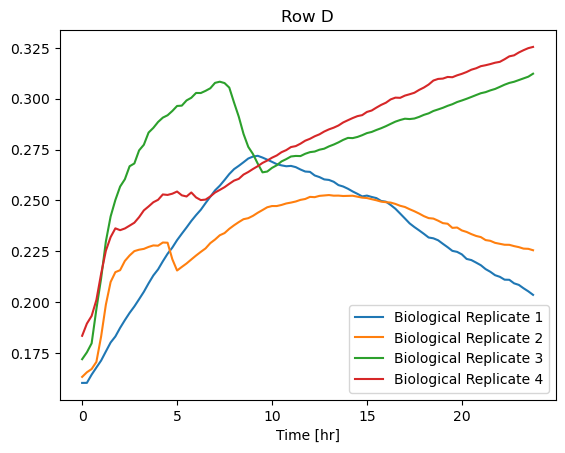

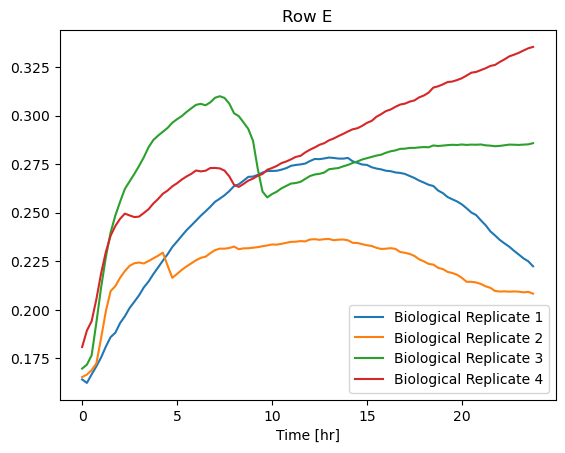

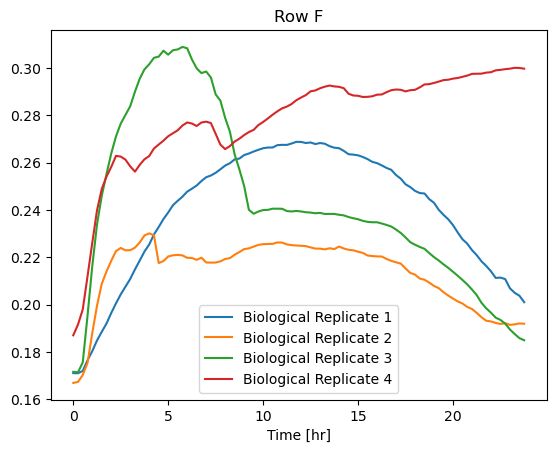

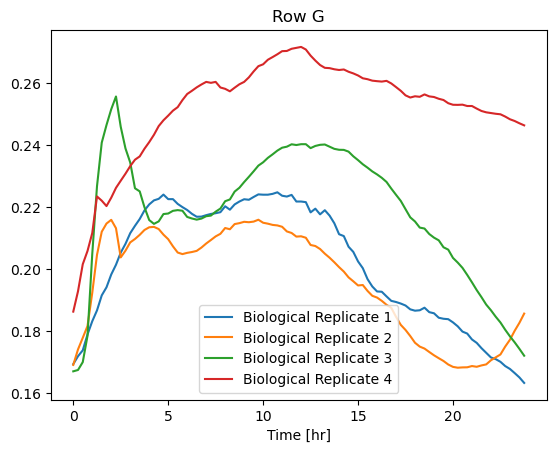

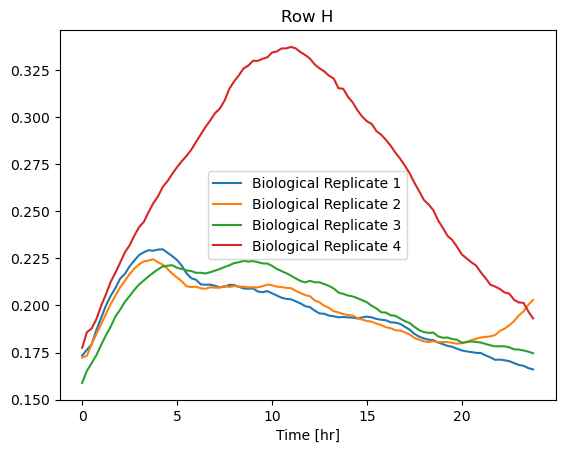

Tech Rep A Averaged - Bio Rep 1  Tech Rep A Averaged - Bio Rep 2  \
Time [hr]                                                                     
0.000000                          0.154033                         0.150267   
0.250028                          0.161933                         0.162733   
0.500056                          0.164567                         0.168500   
0.750083                          0.167933                         0.171667   
1.000111                          0.173933                         0.175167   
...                                    ...                              ...   
22.752194                         0.508300                         0.435667   
23.002222                         0.510833                         0.439667   
23.252250                         0.513400                         0.442667   
23.502278                         0.517633                         0.446067   
23.752278                         0.522967                         0.448867   

           Tech Rep A Averaged - Bio Rep 3  Tech Rep A Averaged - Bio Rep 4  
Time [hr]                                                                    
0.000000                          0.187367                         0.166133  
0.250028                          0.207900                         0.185200  
0.500056                          0.216000                         0.193900  
0.750083                          0.223233                         0.202300  
1.000111                          0.228633                         0.207600  
...                                    ...                              ...  
22.752194                         0.453467                         0.429267  
23.002222                         0.457367                         0.433867  
23.252250                         0.458867                         0.435400  
23.502278                         0.461467                         0.437200  
23.752278                         0.464100                         0.438967  

[96 rows x 4 columns]

In [8]:
num = -1
new_dfs = {}

for char in list_char:
    tables[char] = df1.filter(regex=f'^{char}')
    if char == 'A':
        title = f'row {char} - 0 PFU'
    elif char == 'B':
        title = f'row {char} - < 10 PFU'
    else:
        title = f'row {char} - 10^{num} phage'

    new_dfs[char] = pd.DataFrame()
        
    for i in range(0, 12, 3):
        group_cols = tables[char].columns[i:i+3]
        avg_signal = tables[char][group_cols].mean(axis=1)
        new_dfs[char][f'Tech Rep {char} Averaged - Bio Rep {i//3 + 1}'] = avg_signal
        plt.plot(tables[char].index, avg_signal, label=f'Biological Replicate {i//3 + 1}')
    
        
    plt.xlabel('Time [hr]')
    plt.title(f'Row {char}')
    plt.legend()
    plt.show()
    num +=1
    

#plt.figure(figsize=(8, 6))
#auc_values = {col: np.trapz(new_dfs.get('A')[col], x=new_dfs.get('A').index) for col in new_dfs.get('A').columns}
#sns.histplot(auc_values.values(), bins=5, kde=True)
        

new_dfs.get('A')

In [9]:
def AUC_graph(df, title = None):
    auc_values = {col: np.trapz(df[col], x=df.index) for col in df.columns}
    sns.histplot(auc_values.values(), bins=7, kde=True)
    plt.xlabel('AUC Values', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.title(title, fontsize=16)
    print(sum(auc_values.values()) / len(auc_values.values()) )

7.919443351030821
6.587406393062671
6.521902405235259
6.097485389515249
6.123573319147237
5.793248417087072
5.16453610717242
5.148454550486584


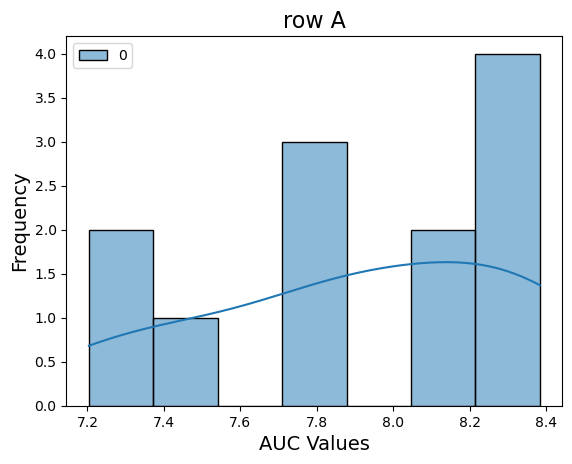

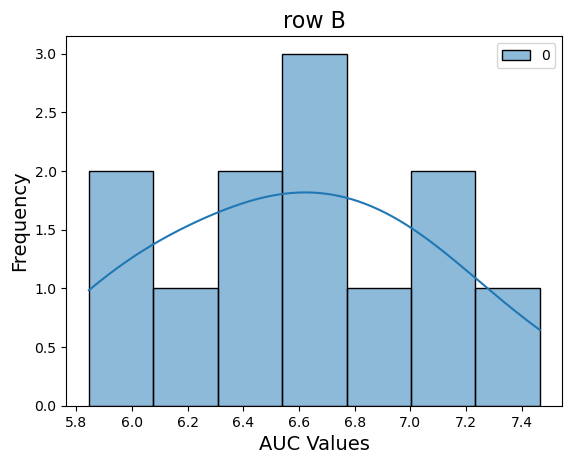

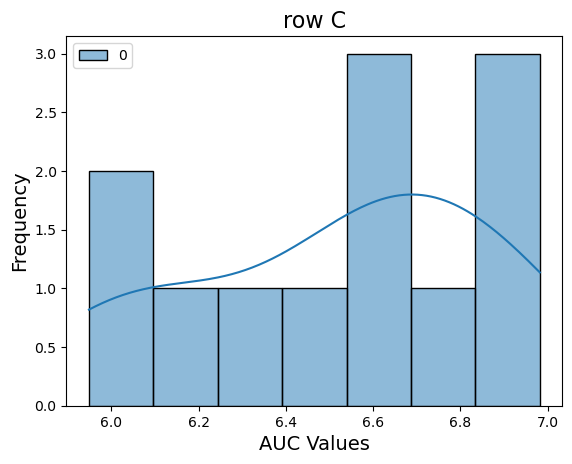

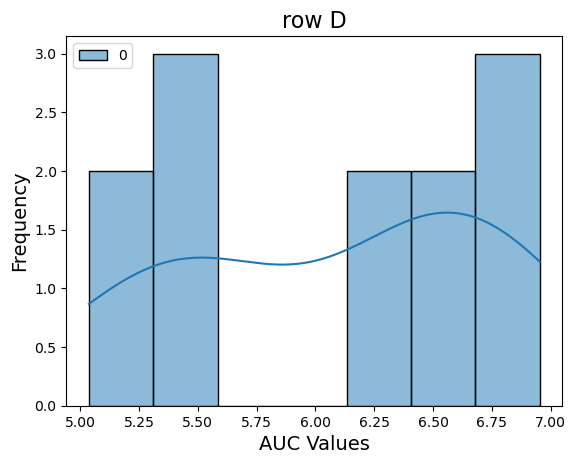

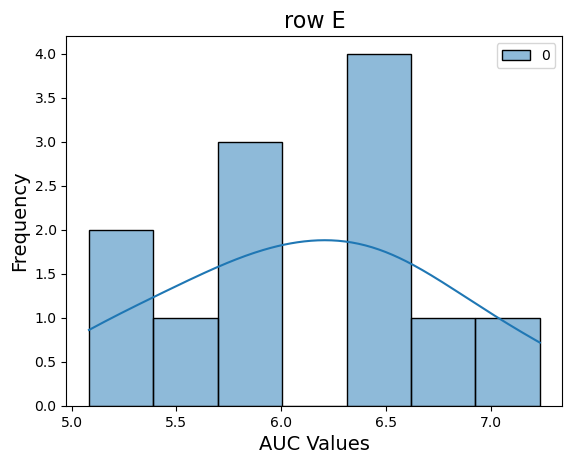

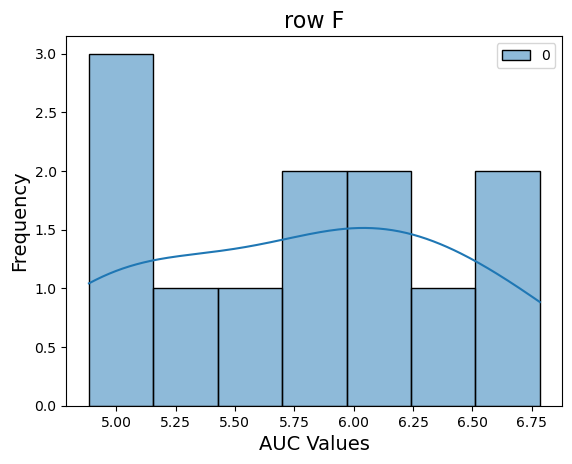

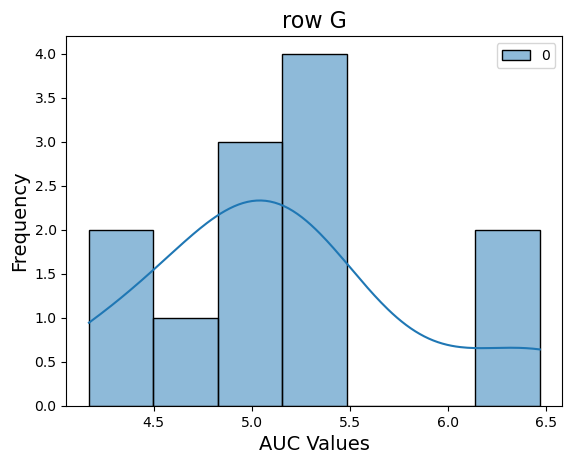

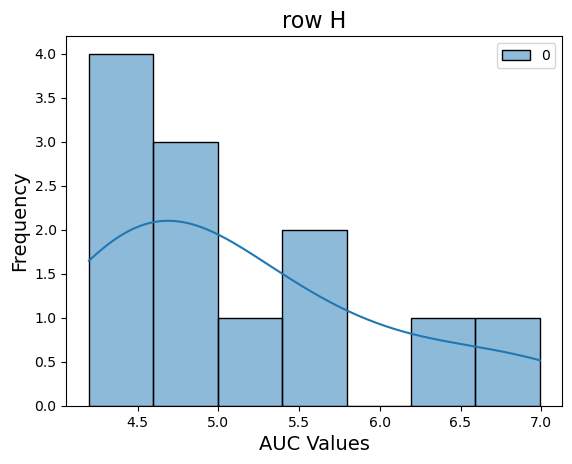

In [10]:
for char in list_char:
    plt.figure()
    AUC_graph(tables.get(char), f'row {char}')

In [12]:
df1.head(85)

Series         A1      A2      A3      A4      A5      A6      A7      A8  \
Time [hr]                                                                   
0.000000   0.1544  0.1529  0.1548  0.1483  0.1528  0.1497  0.1849  0.1920   
0.250028   0.1612  0.1591  0.1655  0.1634  0.1641  0.1607  0.2097  0.2107   
0.500056   0.1619  0.1649  0.1669  0.1692  0.1677  0.1686  0.2153  0.2182   
0.750083   0.1649  0.1679  0.1710  0.1701  0.1716  0.1733  0.2231  0.2250   
1.000111   0.1705  0.1746  0.1767  0.1733  0.1748  0.1774  0.2282  0.2299   
...           ...     ...     ...     ...     ...     ...     ...     ...   
20.001917  0.4666  0.4568  0.4483  0.4147  0.3953  0.3979  0.4273  0.4252   
20.251944  0.4714  0.4599  0.4502  0.4175  0.3973  0.3995  0.4289  0.4273   
20.501972  0.4752  0.4638  0.4544  0.4215  0.3999  0.4025  0.4308  0.4306   
20.752000  0.4814  0.4692  0.4606  0.4249  0.4005  0.4056  0.4341  0.4304   
21.002028  0.4833  0.4718  0.4628  0.4259  0.4028  0.4083  0.4351  0.4310   

Series         A9     A10  ...      H3      H4      H5      H6      H7  \
Time [hr]                  ...                                           
0.000000   0.1852  0.1644  ...  0.1641  0.1723  0.1688  0.1760  0.1569   
0.250028   0.2033  0.1856  ...  0.1681  0.1690  0.1710  0.1797  0.1645   
0.500056   0.2145  0.1942  ...  0.1713  0.1773  0.1773  0.1841  0.1688   
0.750083   0.2216  0.2027  ...  0.1789  0.1813  0.1829  0.1905  0.1741   
1.000111   0.2278  0.2077  ...  0.1853  0.1848  0.1876  0.1978  0.1793   
...           ...     ...  ...     ...     ...     ...     ...     ...   
20.001917  0.4301  0.4030  ...  0.1693  0.1585  0.1677  0.2136  0.1790   
20.251944  0.4321  0.4054  ...  0.1685  0.1600  0.1680  0.2140  0.1784   
20.501972  0.4348  0.4060  ...  0.1678  0.1611  0.1695  0.2141  0.1781   
20.752000  0.4387  0.4081  ...  0.1677  0.1623  0.1700  0.2146  0.1766   
21.002028  0.4392  0.4075  ...  0.1685  0.1633  0.1712  0.2144  0.1764   

Series         H8      H9     H10     H11     H12  
Time [hr]                                          
0.000000   0.1530  0.1667  0.1806  0.1741  0.1779  
0.250028   0.1596  0.1717  0.1876  0.1844  0.1853  
0.500056   0.1665  0.1728  0.1899  0.1874  0.1860  
0.750083   0.1715  0.1752  0.1971  0.1932  0.1878  
1.000111   0.1765  0.1813  0.2030  0.2026  0.1938  
...           ...     ...     ...     ...     ...  
20.001917  0.1778  0.1838  0.1802  0.2123  0.2887  
20.251944  0.1776  0.1855  0.1776  0.2102  0.2870  
20.501972  0.1779  0.1865  0.1764  0.2106  0.2817  
20.752000  0.1779  0.1874  0.1744  0.2104  0.2787  
21.002028  0.1771  0.1874  0.1725  0.2083  0.2718  

[85 rows x 96 columns]

Text(0, 0.5, 'OD')

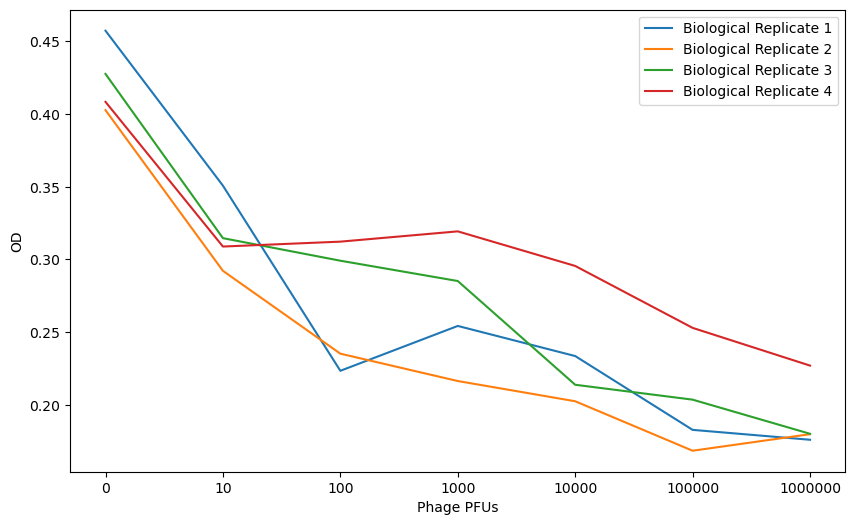

In [13]:
row_12hr = df1.loc[np.isclose(df1.index, 20.001917)] #change to 14 hrs


plt.figure(figsize=(10, 6))

line_1 = row_12hr.filter(regex=r'^[A-Za-z]+[1-3]$').groupby(df.columns.str[0], axis=1).mean().drop('B', axis=1)
line_2 = row_12hr.filter(regex=r'^[A-Za-z]+[4-6]$').groupby(df.columns.str[0], axis=1).mean().drop('B', axis=1)
line_3 = row_12hr.filter(regex=r'^[A-Za-z]+[7-9]$').groupby(df.columns.str[0], axis=1).mean().drop('B', axis=1)
line_4 = row_12hr.filter(regex=r'^[A-Za-z]+(10|11|12)$').groupby(df.columns.str[0], axis=1).mean().drop('B', axis=1)
dict_values = {'A': '0', 'C': '10', 'D': '100', 'E': '1000', 'F': '10000', 'G': '100000', 'H': '1000000'}
line_arr = [line_1, line_2, line_3, line_4]

x_values = list(dict_values.values())
x_values

#plt.plot(x_values, line_1.iloc[0, :], label='Replicates 1-3')

num = 1
for line in line_arr: 
    sns.lineplot(x=(dict_values.values()), y=line.iloc[0, :], label = f'Biological Replicate {num}')
    num+=1
    
plt.xlabel('Phage PFUs')
plt.ylabel('OD')

In [8]:
tables.get('A')
tables.get('A')[tables.get('A').columns[0:3]].mean(axis=1)

Time [hr]
0.000000     0.154033
0.250028     0.161933
0.500056     0.164567
0.750083     0.167933
1.000111     0.173933
               ...   
22.752194    0.508300
23.002222    0.510833
23.252250    0.513400
23.502278    0.517633
23.752278    0.522967
Length: 96, dtype: float64